In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
train_data_path = "data_and_model/data/"
img_size = 224
batch_size = 8
EPOCHS = 30

labels = os.listdir(train_data_path)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)


train_data_gen = datagen.flow_from_directory(
    train_data_path,
    target_size=(img_size, img_size),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    subset='training',
    batch_size=batch_size,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    interpolation='nearest'
)


val_data_gen = datagen.flow_from_directory(
    train_data_path,
    target_size=(img_size, img_size),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    subset='validation',
    batch_size=batch_size,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    interpolation='nearest'
)

Found 135 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


In [4]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
            input_shape=(img_size, img_size,3),
            include_top=False,
            weights='imagenet')

#2. Locks all the base model's weights
for layer in base_model.layers:
    layer.trainable = False

#3. Adds a few layers to the end of the model
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(len(os.listdir(train_data_path)), activation='softmax')(x)


new_model = tf.keras.Model(base_model.input, x)


try:
    os.mkdir("data_and_model/model")
except:
    pass


model_dir = "data_and_model/model/Model.hdf5"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_dir,
    save_best_only=True,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max')

new_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [5]:
#4. Trains the new model
history = new_model.fit(
    train_data_gen,
    epochs=EPOCHS,
    callbacks=[model_checkpoint_callback],
    validation_data = val_data_gen
)

c:\Users\Acer\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\Users\Acer\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
17/17 [==============================] - 37s 889ms/step - loss: 20.7876 - accuracy: 0.3407 - val_loss: 12.7240 - val_accuracy: 0.3636
Epoch 2/30
17/17 [==============================] - 5s 268ms/step - loss: 9.0533 - accuracy: 0.5333 - val_loss: 6.9605 - val_accuracy: 0.2727
Epoch 3/30
17/17 [==============================] - 7s 431ms/step - loss: 4.5037 - accuracy: 0.5481 - val_loss: 2.9331 - val_accuracy: 0.6364
Epoch 4/30
17/17 [==============================] - 4s 241ms/step - loss: 2.0741 - accuracy: 0.7407 - val_loss: 1.6573 - val_accuracy: 0.6061
Epoch 5/30
17/17 [==============================] - 4s 228ms/step - loss: 1.9636 - accuracy: 0.6370 - val_loss: 1.5306 - val_accuracy: 0.6364
Epoch 6/30
17/17 [==============================] - 4s 227ms/step - loss: 1.2558 - accuracy: 0.7037 - val_loss: 1.2181 - val_accuracy: 0.6364
Epoch 7/30
17/17 [==============================] - 4s 226ms/step - loss: 0.6600 - accuracy: 0.7333 - val_loss: 0.9030 - val_accuracy: 0.5455
Epo

Text(0.5, 1.0, 'Angry')

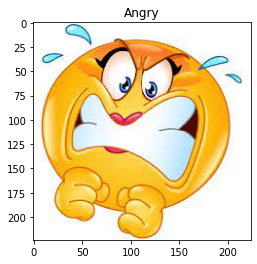

In [6]:
img = load_img('data_and_model/test_data/images (32).jpg', target_size = (img_size, img_size))
img = img_to_array(img)
img = np.expand_dims(img, axis = 0)

plt.imshow(load_img('data_and_model/test_data/images (32).jpg', target_size = (img_size, img_size)))
plt.title(labels[np.argmax(new_model.predict(img))])

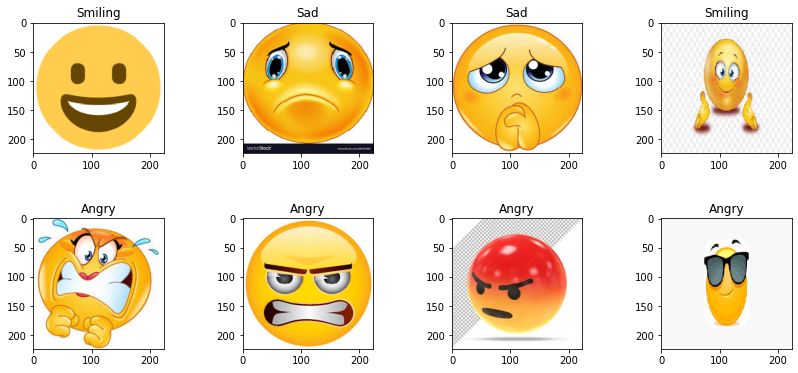

In [7]:
test_data_path = 'data_and_model/test_data/'

fig, axs = plt.subplots(2,4, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(len(os.listdir(test_data_path))):
    tp = os.path.join(test_data_path, os.listdir(test_data_path)[i])
    
    img = load_img(tp, target_size = (img_size, img_size))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    
    
    

    axs[i].imshow(load_img(tp, target_size = (img_size, img_size)))
    axs[i].set_title(labels[np.argmax(new_model.predict(img))])